# Fundação Getúlio Vargas
# Mestrado em Modelagem Informacional
# Visualização da Informação
# Trabalho II: Análise e Reprodução de uma visualização reconhecida ou relevante Historicamente

Aluna: Juliana Carvalho de Souza   

Curso: Graduação em Matemática Aplicada/4o Período

Professora: Asla Medeiros e Sá

Data: 26 de Outubro de 2021


Uma visualização importante foi a do Gapminder, proposta por Hans Rosling em 2005, como detalhado em <https://www.washingtonpost.com/news/wonk/wp/2017/02/08/remembering-hans-rosling-the-visualization-pioneer-who-made-data-dance/>. A visualização dinâmica explorava problemas de desenvolvimento social utilizando gráficos de bolhas. A palestra de 2006 do TedTalk entitulada "The best stats you've ever seen" e disponível em [https://www.youtube.com/watch?v=hVimVzgtD6w] foi responsável por popularizar a chamada "storytellyng with data". Além desse vídeo, outro que fez sucesso foi o da BBC, disponível em: https://www.youtube.com/watch?v=jbkSRLYSojo&t=4s

Segundo Rosling and Johansson, 2009:

"The main innovation from Gapminder is so far 'the moving bubble chart' in the form of the Trendalyzer software that was acquired by Google in 2007. Google has made a 2008 version freely available as Google Motion Chart. Gapminder is a non-profit foundation founded in 2005 with a goal of '…increase use and understanding of statistics and other information about social, economic and environmental development at local, national and global levels.” 

Uma das visualizações geradas por Rosling relaciona a renda per capta com a saúde de países de todos os continentes do globo, utilizando bolhas proporcionais às populações desses países. Essa visualização está disponível abaixo. Neste trabalho nos propomos a reproduzi-la, utilizando como ferramentas bibliotecas do Python, como o matplotlib e o plotly.

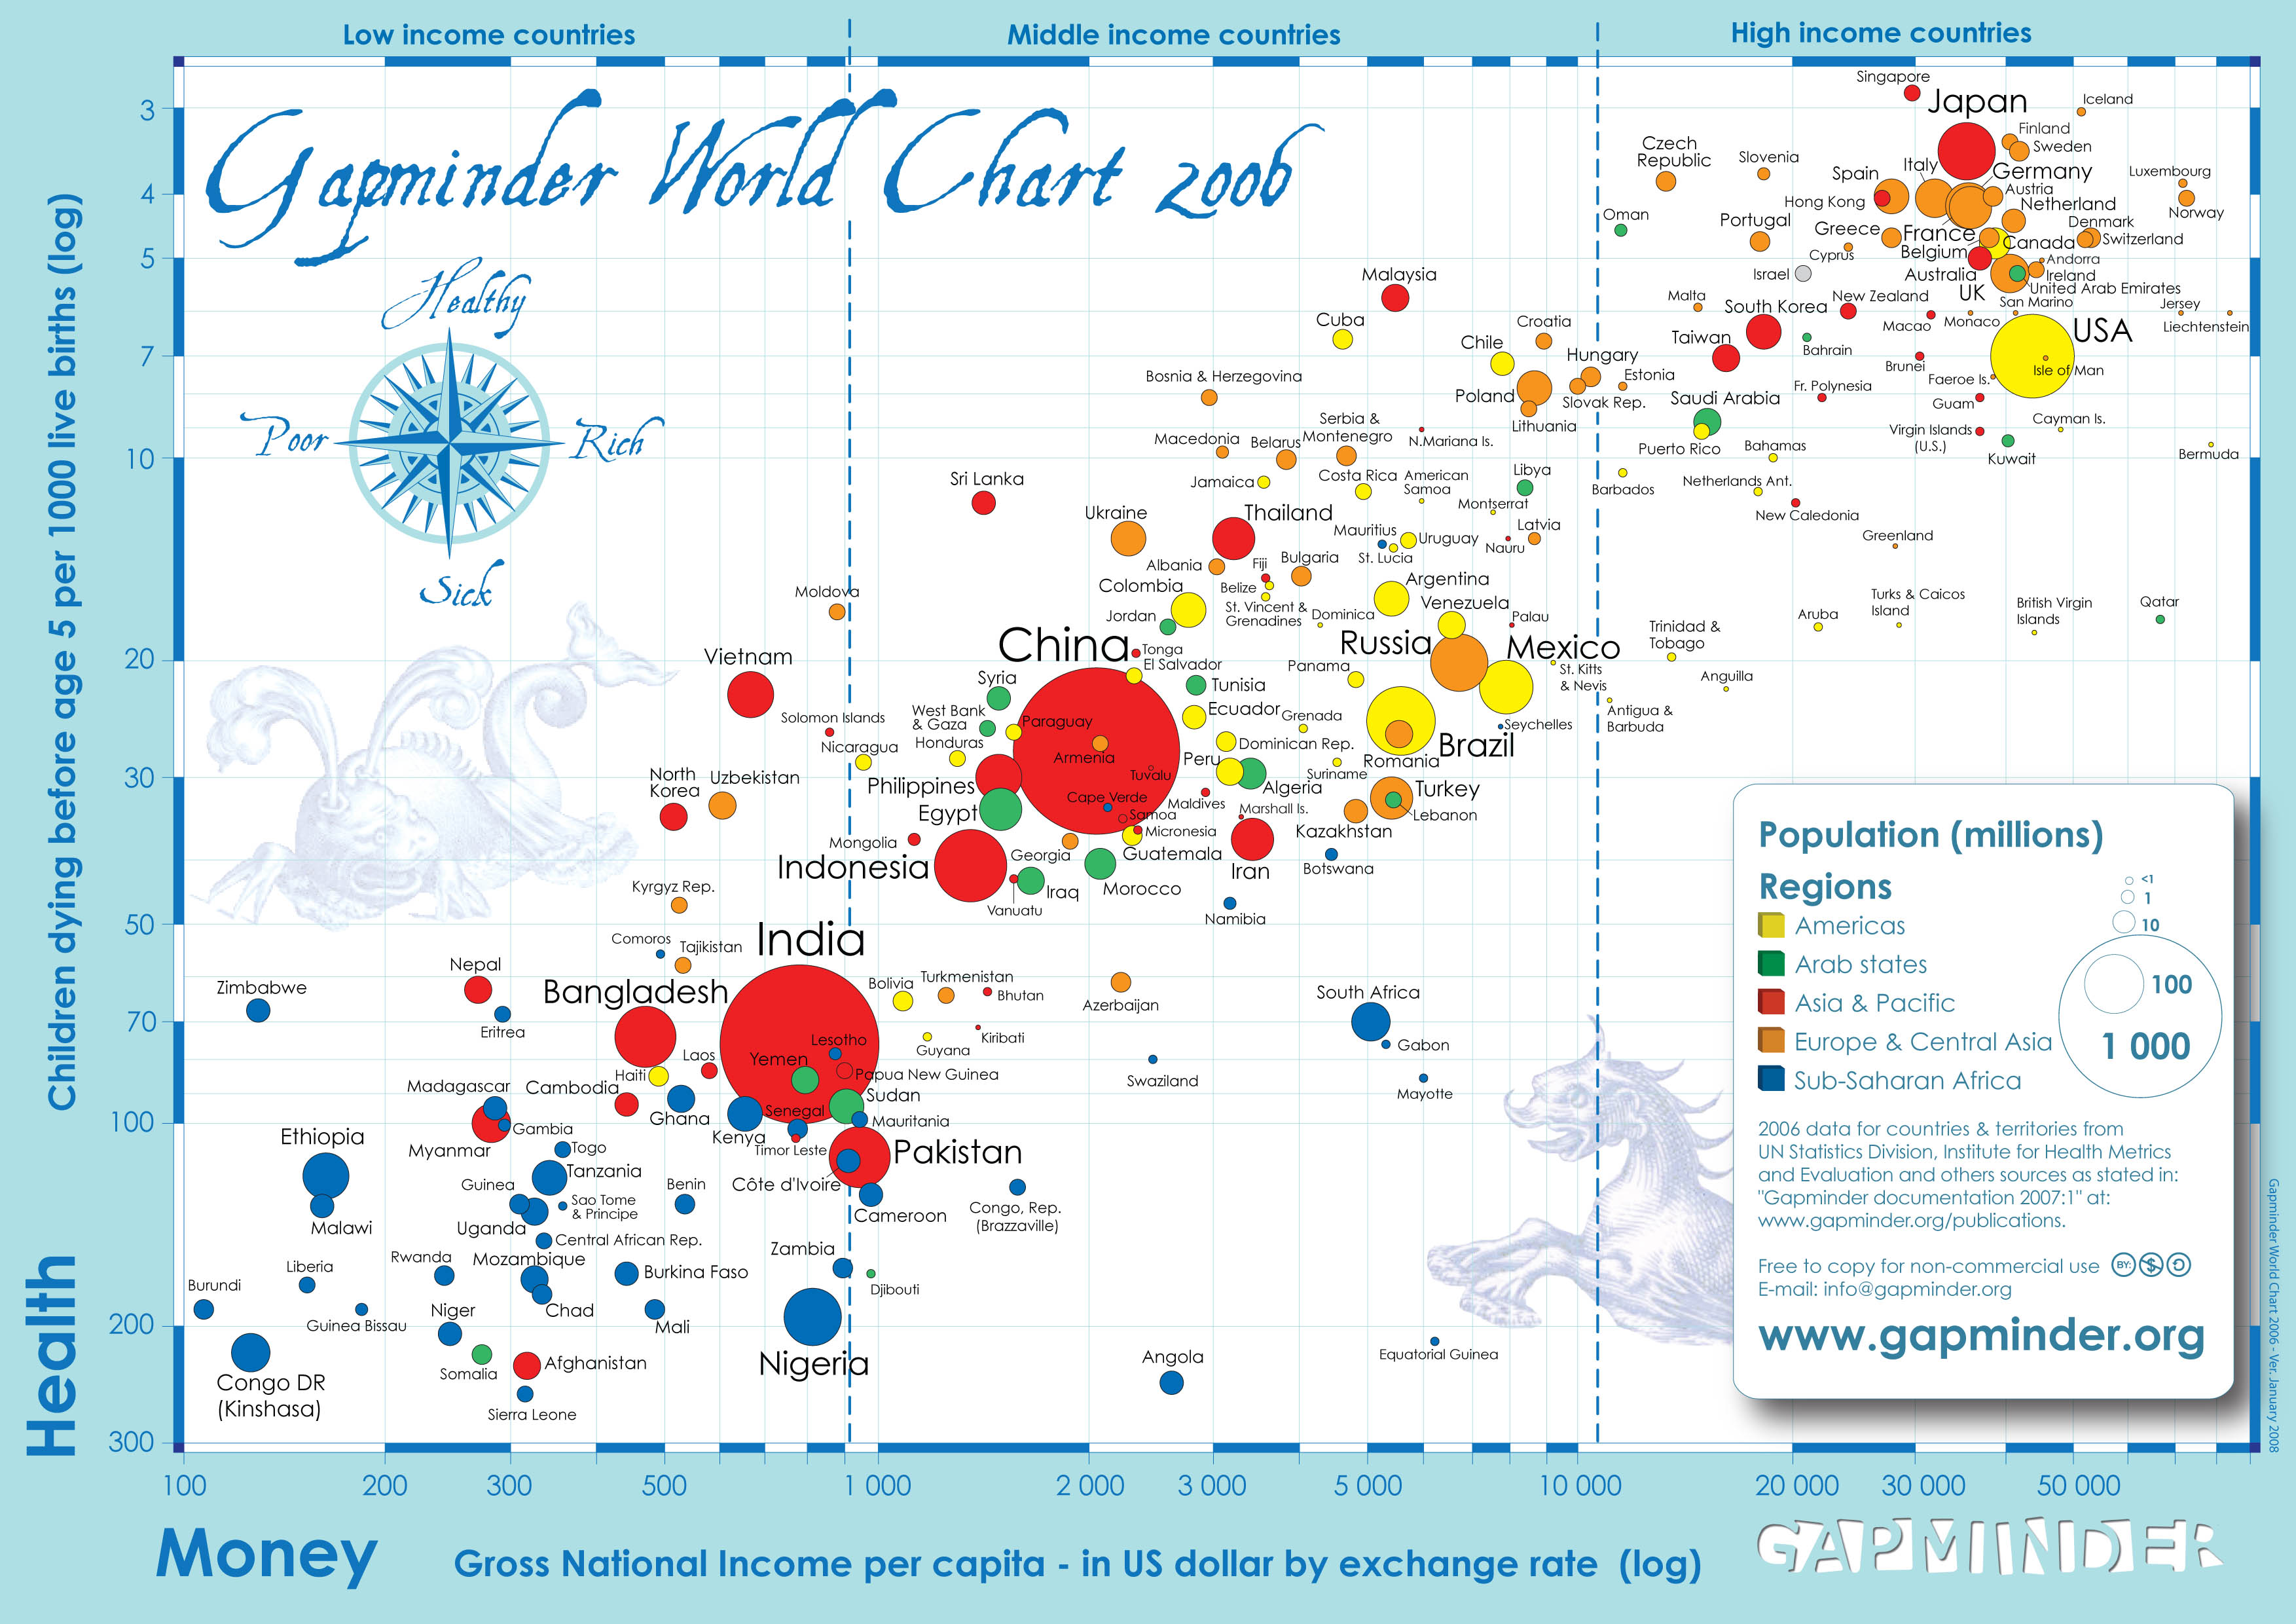

In [2]:
from IPython.display import Image
Image(filename="imagem.jpg")

+ Parte1: Encontrar os dados (compartilhar referências de dados no slack)
+ Parte2: Fazer uma análise de qual seria a função pretendida com a visualização proposta. 
+ Parte3: Fazer uma reprodução da visualização escolhida utilizando uma ferramenta computacional atual (de preferência a mesma escolhida por vocês no trabalho 1)
+ Parte4: Propor alguma modificação (fundamentando conceitualmente) na visualização proposta. Exemplo: Incluir anotação, incluir interatividade, modificar título ou legenda, adicionar informação, etc.

+ Parte1: Encontrar os dados (compartilhar referências de dados no slack)

Os dados do Gapminder utilizado já estavam implementados na biblioteca plotly.express, não sendo necessário obtê-los e limpá-los.

**2** A função pretendida com a visualização proposta é surpreender o público com expectativas que vão além do senso comum sobre o desenvolvimento social.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import plotly.express as px
import plotly.offline as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.figure_factory import create_table

from vega_datasets import data


In [5]:
# Carrega os dados disponíveis em plotly express
gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


Vamos também obter alguma informação sobre esses dados.

In [6]:
gapminder.shape

(1704, 8)

In [7]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [8]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [9]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165877,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


In [10]:
create_table(gapminder.head()) 

In [32]:
#adding animation to bubble plot
px.scatter(gapminder,x='gdpPercap',y='lifeExp',color='continent', color_discrete_sequence=["red", "brown", "blue", "yellow", "green"], size='pop',size_max=100,
          hover_name='country',log_x=True, animation_frame='year',
          animation_group='country',range_y=[25,100], range_x=[100,100000], labels={"lifeExp": "lifespan", "gdpPercap":"income"})

In [12]:
#plot geographical maps 
px.choropleth(gapminder,locations='iso_alpha',color='lifeExp',hover_name='country',
             animation_frame='year',color_continuous_scale=px.colors.sequential.Plasma,projection='natural earth')